You can do EDA and then classification if a person is prone to heart attack or not.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = 'https://raw.githubusercontent.com/Kaiya279/Heart-Attack-Analysis-EDA-and-Prediction/main/heart.csv'
patients_report = pd.read_csv(data)

In [ ]:
patients_report.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
patients_report.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
#Importing StatsModel Library for displaying detailed information about model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
#Checking for Null Values


patients_report.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Missing Values

In [ ]:
patients_report.isnull()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


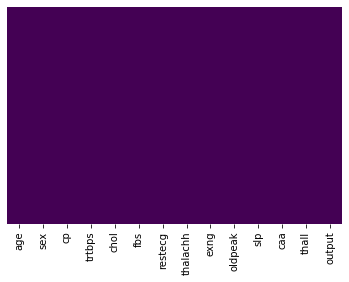

In [ ]:
sns.heatmap(patients_report.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Find missing values using method



In [ ]:
def find_missing_data(patients_report):
  total = patients_report.isnull().sum().sort_values(ascending=False)
  percent = (patients_report.isnull().sum()/patients_report.isnull().count()).sort_values(ascending=False)
  missing_data = pd.concat([total,percent], axis=1,keys=['Total','Percent'])
  return missing_data

find_missing_data(patients_report)

,Total,Percent
output,0,0.0
thall,0,0.0
caa,0,0.0
slp,0,0.0
oldpeak,0,0.0
exng,0,0.0
thalachh,0,0.0
restecg,0,0.0
fbs,0,0.0
chol,0,0.0



Questions (before any analysis) :
Before starting any analysis I like to look at the data and note down some questions . I like this approach because data analysis becomes easier.

1) Age : What is the age group of people who experience most heart attacks?. Older people are usually more susceptible to heart attacks (need confirmation) .

2) Sex : What is the ratio of male and female in our data and which gender experience more heart attacks?.

3) CP (Chest Pain and types) : Is there any relationship between types of chestpain and heart attack?. If so, what is the type of chest pain that resulted in most heart attacks? (important and must be closely observed)

4) trestbps (resting blood pressure) : Is there any relationship between resting bp and heart attack? .( must be looked at closely)

5) chol (cholestoral) : Is there any threshold for cholesterol levels?.Bad cholestoral is a cause of heart attack and this can help in determining the level (useful for analysis).

6) fbs (fasting blood sugar) : People who experienced heart attacks also had a fbs > 120? . What is the ratio of people with fbs >120 and people with fbs <120.

7) restecg (resting electrocardiographic results) : Is there a relationship between resting ecg and heart attack? If so , which value is more suceptible ?

8) thalach (maximum heart rate achieved) : Can maximum heart rate give any insights to the cause of heart attack?. If so, ise there any threshold for this?

9) exang (exercise induced angina) : What is the ratio of people with exang = 1 and exang = 0.(probably a realtionship between exang and heart attack )

10) ca (number of major blood vessels 0-3 ) : Is there any relationship between ca and heart attack?.Lesser vessels may lead to high chance of heart attack (need confirmation).

11) Target : Our target function.



In [ ]:
#What is the  age group who experienced most heart attack?  

len(patients_report["age"].unique())
patients_report.value_counts(normalize=True)


age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  caa  thall  output
38   1    2   138     175   0    1        173       0     0.0      2    4    2      1         0.006601
77   1    0   125     304   0    0        162       1     0.0      2    3    2      0         0.003300
51   0    2   130     256   0    0        149       0     0.5      2    0    2      1         0.003300
              140     308   0    0        142       0     1.5      2    1    2      1         0.003300
     1    0   140     261   0    0        186       1     0.0      2    0    2      1         0.003300
                                                                                                ...   
59   1    0   138     271   0    0        182       0     0.0      2    0    2      1         0.003300
              140     177   0    1        162       1     0.0      2    1    3      0         0.003300
              164     176   1    0        90        0     1.0      1    2    1      0

Descriptive Statistics

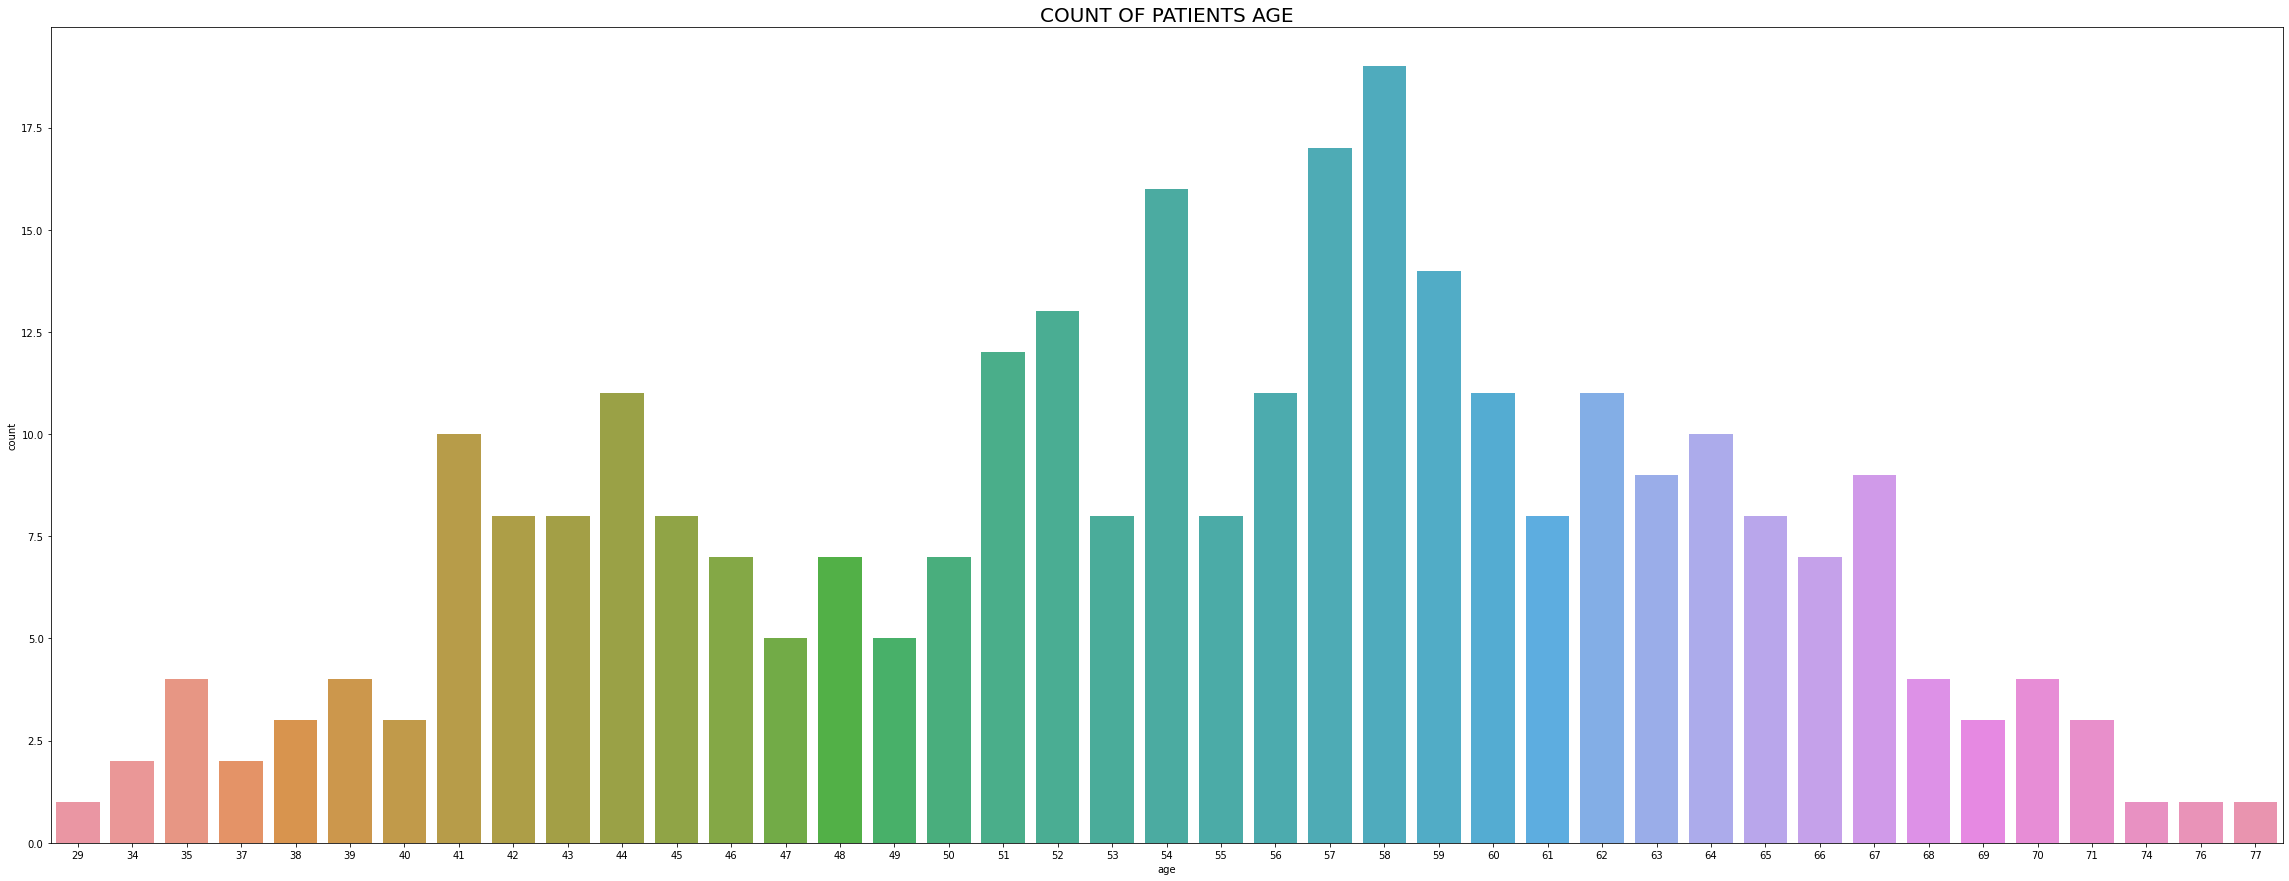

In [ ]:
plt.figure(figsize=(40,15))
plt.title("COUNT OF PATIENTS AGE",fontsize=20)
sns.countplot(x=patients_report["age"])


In [ ]:
patients_report.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Observations 

1) Average age is 54 and minimum age is 29 #no children involved in this data

2) Average BP(trtbps) is 131 and maximum is 200

3) Average cholestrol is 246 and maximum is 564

4) Average heart rate(thalachh) is 149 (common while exercising) and maximum is 202 (questionable)

In [ ]:
patients_report.head(2)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [ ]:
# Classifying data into numerical and categorical features.

data_numerical = patients_report[['age','trtbps','chol','thalachh','oldpeak']]

data_categorical = patients_report[['sex','cp','fbs','restecg','exng','caa','thall','output']]

Numerical Variable analysis

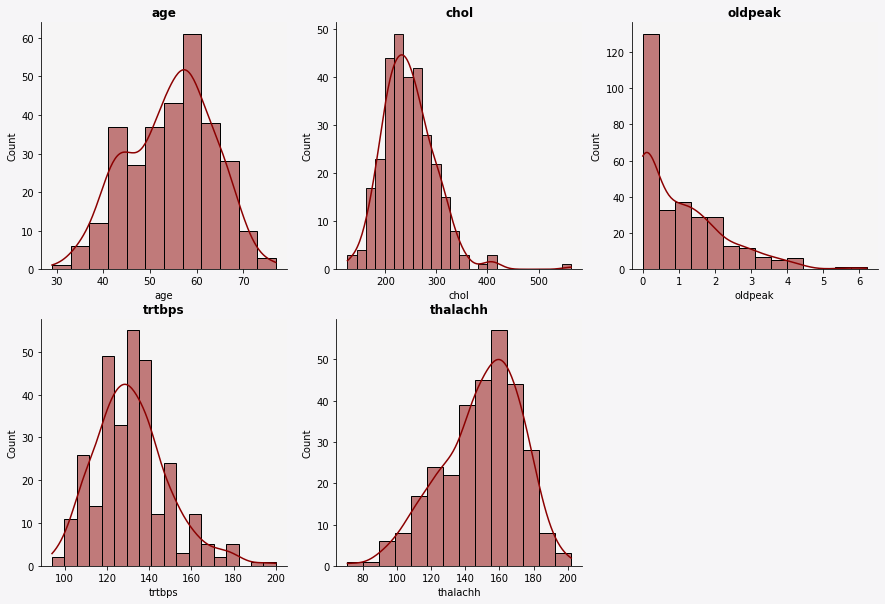

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(15,10))
fig.patch.set_facecolor('#f6f5f7')
for i, idx in enumerate(data_numerical.columns):
  sns.histplot(ax=ax[i%2,i//2], x= data_numerical[idx], color='darkred', kde=True, alpha=0.5)
  ax[i%2,i//2].set_title(idx,fontweight='bold')
  ax[i%2,i//2].set_facecolor('#f6f5f5')
  for z in ["top","right"]:
        ax[i%2,i//2].spines[z].set_visible(False)
ax[1,2].set_visible(False)

Observations

1) Age distribution seems normal with some skewness to the right

2) Cholestrol seems normally distibuted

3) The Old Peak is highly skewed towards the left (Postive skew)

4) Resting BP seems normal with some skewness towards left.

5) The maximum heart rate appears normal with some skewness towards right.



Skewness and Kurtosis

In [ ]:
sak = []
for i in data_numerical.columns :
  sak.append([i, data_numerical[i].skew(),data_numerical[i].kurt()])

skew_kurt = pd.DataFrame(sak, columns = ['Columns', ' Skewness', 'Kurtosis'])
skew_kurt


,Columns,Skewness,Kurtosis
0,age,-0.202463,-0.542167
1,trtbps,0.713768,0.929054
2,chol,1.143401,4.505423
3,thalachh,-0.537410,-0.061970
4,oldpeak,1.269720,1.575813




General Rule : 

1) If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

1) Kurtosis is a measure of the combined sizes of the two tails. It measures the amount of probability in the tails. The value is often compared to the kurtosis of the normal distribution, which is equal to 3. If the kurtosis is greater than 3, then the dataset has heavier tails than a normal distribution . If the kurtosis is less than 3, then the dataset has lighter tails than a normal distribution.


Analyis of Numerical Variables with Target

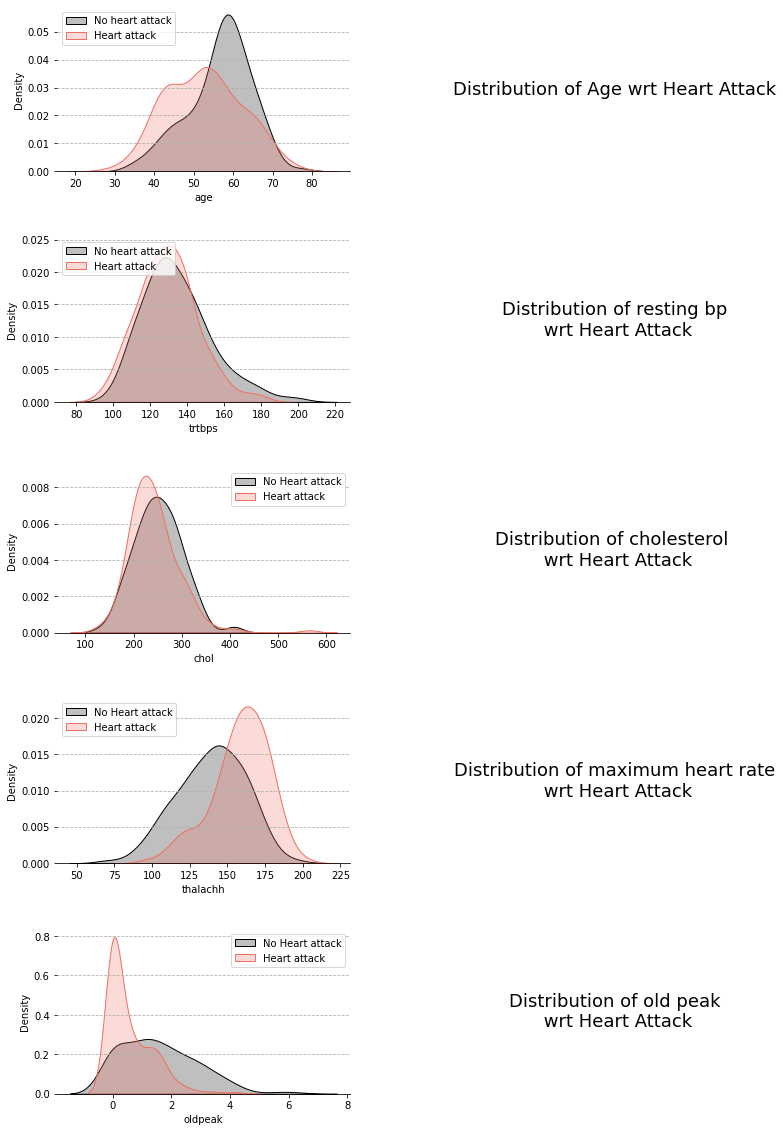

In [ ]:
fig = plt.figure(figsize=(20,20))
gs = fig.add_gridspec(5,3)
gs.update(wspace=0.4, hspace=0.4)
#adding figures

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

axes=[ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

#data_numerical = patients_report[['age','trtbps','chol','thalachh','oldpeak']]
background_color = '#ffffff'
for i in axes:
  i.set_facecolor(background_color)

fig.patch.set_facecolor(background_color)

#ax0
sns.kdeplot(ax=ax0, x=patients_report.loc[patients_report['output']==0]['age'], color = 'black', label = 'No heart attack', shade = True)
sns.kdeplot(ax=ax0, x=patients_report.loc[patients_report['output']==1]['age'], color = '#ec7063', label = 'Heart attack', shade = True)
ax0.legend(loc = 'upper left')
ax0.grid(linestyle='--',axis='y')

#ax1

ax1.text(0.5,0.5,'Distribution of Age wrt Heart Attack',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18)

#ax2
sns.kdeplot(ax=ax2, x=patients_report.loc[patients_report['output']==0]['trtbps'], color = 'black', label = 'No heart attack', shade = True)
sns.kdeplot(ax=ax2, x=patients_report.loc[patients_report['output']==1]['trtbps'], color = '#ec7063', label = 'Heart attack', shade = True)
ax2.legend(loc = 'upper left')
ax2.grid(linestyle='--',axis='y')

#ax3
ax3.text(0.5,0.5,'Distribution of resting bp\n wrt Heart Attack',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18)

#ax4
sns.kdeplot(ax=ax4,x=patients_report.loc[patients_report['output']==0]['chol'],color='black',label='No Heart attack',shade=True)
sns.kdeplot(ax=ax4,x=patients_report.loc[patients_report['output']==1]['chol'],color='#ec7063',label='Heart attack',shade=True)
ax4.legend(loc = 'upper right')
ax4.grid(linestyle='--', axis='y')

#ax5
ax5.text(0.5,0.5,'Distribution of cholesterol \n wrt Heart Attack',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18)

#ax6
sns.kdeplot(ax=ax6,x=patients_report.loc[patients_report['output']==0]['thalachh'],color='black',label='No Heart attack',shade=True)
sns.kdeplot(ax=ax6,x=patients_report.loc[patients_report['output']==1]['thalachh'],color='#ec7063',label='Heart attack',shade=True)
ax6.legend(loc = 'upper left')
ax6.grid(linestyle='--', axis='y')

#ax7
ax7.text(0.5,0.5,'Distribution of maximum heart rate\n wrt Heart Attack',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18)

#ax8
sns.kdeplot(ax=ax8,x=patients_report.loc[patients_report['output']==0]['oldpeak'],color='black',label='No Heart attack',shade=True)
sns.kdeplot(ax=ax8,x=patients_report.loc[patients_report['output']==1]['oldpeak'],color='#ec7063',label='Heart attack',shade=True)
ax8.legend(loc = 'upper right')
ax8.grid(linestyle='--', axis='y')

#ax9
ax9.text(0.5,0.5,'Distribution of old peak\n wrt Heart Attack',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18)


# removing labels

axes1= [ax1,ax3,ax5,ax7,ax9]
for i in axes1:
  i.spines['bottom'].set_visible(False)
  i.spines['left'].set_visible(False)
  i.set_xlabel("")
  i.set_ylabel("")
  i.set_xticklabels([])
  i.set_yticklabels([])
  i.tick_params(left=False, bottom=False)

# removing spines of figures
for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)



**Bivariate Analysis of Numerical Data **

The best way to do bivariate analysis of numerical data is to make use of scatterplots.

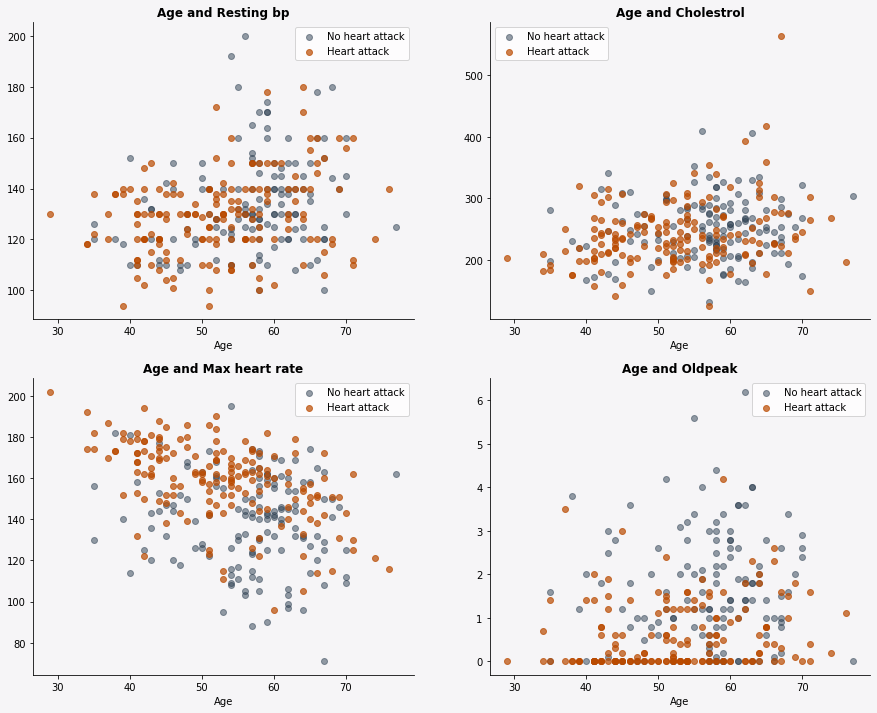

In [ ]:
'''data_numerical = patients_report[['age','trtbps','chol','thalachh','oldpeak']]
Age with other numerical data'''

fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2,2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3=  fig.add_subplot(gs[1,1])
axes=[ax0,ax1,ax2,ax3]
background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color)


# Age and Resting bp
ax0.scatter(x='age',y='trtbps',data=patients_report[patients_report['output']==0],alpha=0.5,color='#2c3e50',label = 'No heart attack')
ax0.scatter(x='age',y='trtbps',data=patients_report[patients_report['output']==1],color='#ba4a00',alpha=0.7,label = 'Heart attack')
ax0.legend()
ax0.set_xlabel('Age')
ax0.set_title('Age and Resting bp',fontweight='bold')

# Age and Cholestrol
ax1.scatter(x='age',y='chol',data=patients_report[patients_report['output']==0],alpha=0.5,color='#2c3e50',label = 'No heart attack')
ax1.scatter(x='age',y='chol',data=patients_report[patients_report['output']==1],color='#ba4a00',alpha=0.7,label = 'Heart attack')
ax1.legend()
ax1.set_xlabel('Age')
ax1.set_title('Age and Cholestrol',fontweight='bold')

# Age and Maximum heart rate
ax2.scatter(x='age',y='thalachh',data=patients_report[patients_report['output']==0],alpha=0.5,color='#2c3e50',label = 'No heart attack')
ax2.scatter(x='age',y='thalachh',data=patients_report[patients_report['output']==1],color='#ba4a00',alpha=0.7,label = 'Heart attack')
ax2.legend()
ax2.set_xlabel('Age')
ax2.set_title('Age and Max heart rate',fontweight='bold')

# Age and Oldpeak
ax3.scatter(x='age',y='oldpeak',data=patients_report[patients_report['output']==0],alpha=0.5,color='#2c3e50',label = 'No heart attack')
ax3.scatter(x='age',y='oldpeak',data=patients_report[patients_report['output']==1],color='#ba4a00',alpha=0.7,label = 'Heart attack')
ax3.legend()
ax3.set_xlabel('Age')
ax3.set_title('Age and Oldpeak',fontweight='bold')

#removing spines
for i in ["top","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)  




Observation

1) People who has resting bp >150 seems to experience lesser heart attacks than people with resting bp <150. There are few outliers here but we can ignore them.

2) No certain relationship between age and cholesterol. The data is spread  evenly.

3) People with maximum heart rate above 140 experience more heart attacks than people with heart rate below 140 (significantly lower than people above mhr >140).

4) People with old peak of 0 experience more heart attacks than any other group. This will be cleared in countplots later.

5) One person whose age is less than 30 had a heart attack. Probably an outlier.

Resting bp with other data

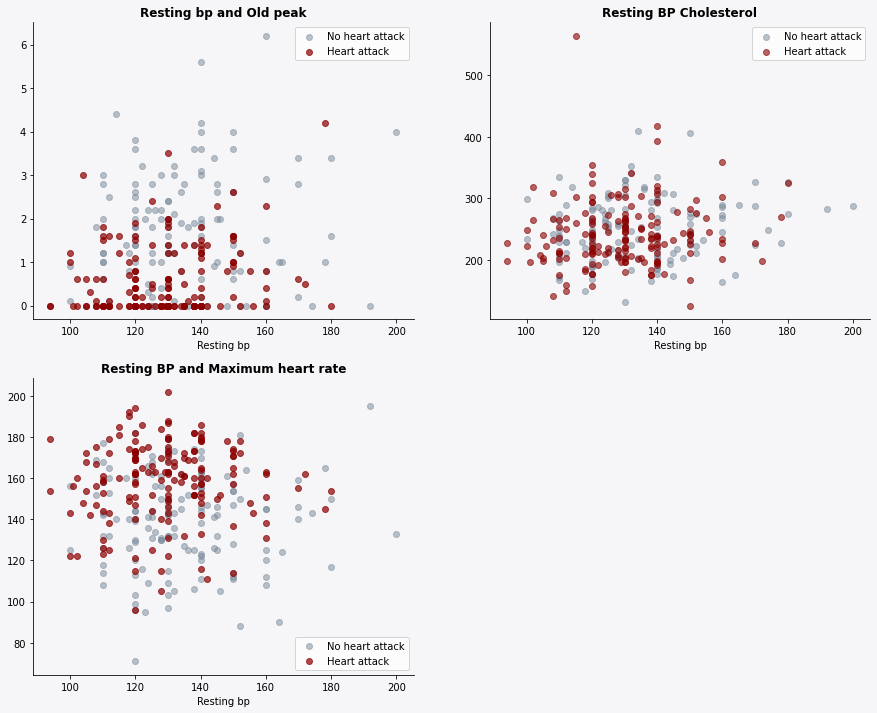

In [ ]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2,2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3=  fig.add_subplot(gs[1,1])
axes=[ax0,ax1,ax2,ax3]
background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color) 

# Resting bp and Old peak
ax0.scatter(x='trtbps',y='oldpeak',data=patients_report[patients_report['output']==0],alpha=0.5,color='lightslategrey',label = 'No heart attack')
ax0.scatter(x='trtbps',y='oldpeak',data=patients_report[patients_report['output']==1],color='darkred',alpha=0.7,label = 'Heart attack')
ax0.set_xlabel('Resting bp')
ax0.legend()
ax0.set_title('Resting bp and Old peak',fontweight='bold')

# Resting BP Cholesterol
ax1.scatter(x='trtbps',y='chol',data=patients_report[patients_report['output']==0],alpha=0.5,color='lightslategrey',label = 'No heart attack')
ax1.scatter(x='trtbps',y='chol',data=patients_report[patients_report['output']==1],color='darkred',alpha=0.6,label = 'Heart attack')
ax1.set_xlabel('Resting bp')
ax1.legend()
ax1.set_title('Resting BP Cholesterol',fontweight='bold')

# Resting BP and Maximum heart rate
ax2.scatter(x='trtbps',y='thalachh',data=patients_report[patients_report['output']==0],alpha=0.5,color='lightslategrey',label = 'No heart attack')
ax2.scatter(x='trtbps',y='thalachh',data=patients_report[patients_report['output']==1],color='darkred',alpha=0.7,label = 'Heart attack')
ax2.set_xlabel('Resting bp')
ax2.legend()
ax2.set_title('Resting BP and Maximum heart rate',fontweight='bold')

#removing spines
for i in ["top","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
ax3.set_visible(False)



Observation

1) People with oldpeak of 0 experience more heart attacks than others

2) People with resting bp above 150 seems to experience less heart attack than others (fewer data here). Resting bp between 120-140 and cholesterol levels 200-270 shows more heart attacks.

3) People with maximum heart rate above 140 experience more heart attack than others

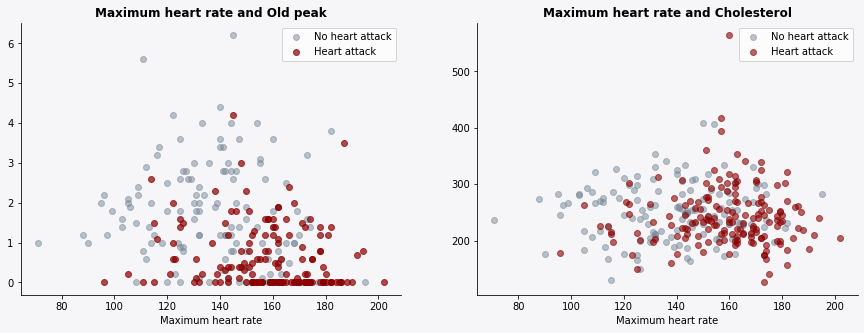

In [ ]:
fig = plt.figure(figsize=(15,5))
gs = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
axes=[ax0,ax1]
background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color) 

# Maximum heart rate and Old peak
ax0.scatter(x='thalachh',y='oldpeak',data=patients_report[patients_report['output']==0],alpha=0.5,color='lightslategrey',label = 'No heart attack')
ax0.scatter(x='thalachh',y='oldpeak',data=patients_report[patients_report['output']==1],color='darkred',alpha=0.7,label = 'Heart attack')
ax0.set_xlabel('Maximum heart rate')
ax0.legend()
ax0.set_title('Maximum heart rate and Old peak',fontweight='bold')

# Resting BP Cholesterol
ax1.scatter(x='thalachh',y='chol',data=patients_report[patients_report['output']==0],alpha=0.5,color='lightslategrey',label = 'No heart attack')
ax1.scatter(x='thalachh',y='chol',data=patients_report[patients_report['output']==1],color='darkred',alpha=0.6,label = 'Heart attack')
ax1.set_xlabel('Maximum heart rate')
ax1.legend()
ax1.set_title('Maximum heart rate and Cholesterol',fontweight='bold')

#removing spines
for i in ["top","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)


Correlation plot for numerical variables

Text(-1.7, 1.1, 'Heatmap of Numerical Variables')

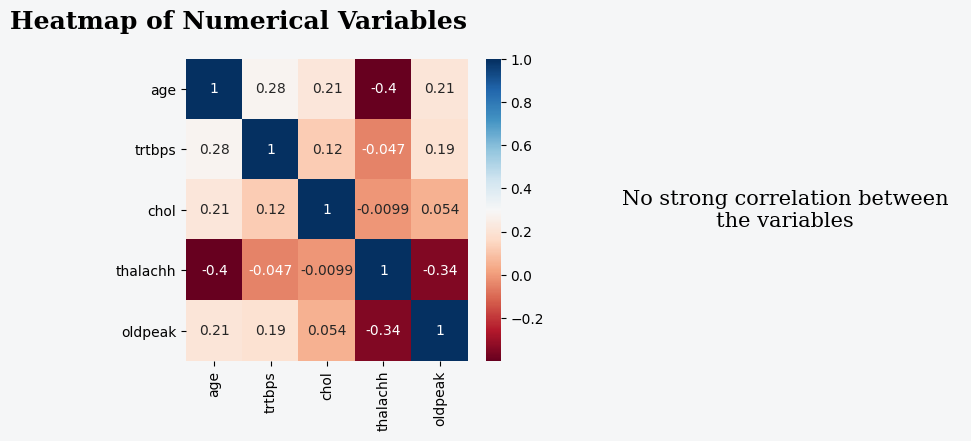

In [ ]:
fig = plt.figure(figsize=(10,4), dpi=100)
gs= fig.add_gridspec(1,2)
#adding subplots

ax0= fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
axes = [ax0,ax1]
background_color= '#f5f6f7'

#changing background color of plots
for i in axes:
  i.set_facecolor(background_color)

#changing the figure background color
fig.patch.set_facecolor(background_color)

#heatmap of the numerical data
matrix = np.triu(data_numerical.corr())
sns.heatmap(ax=ax0, data=data_numerical.corr(), annot=True ,cmap='RdBu')
ax1.text(0.5,.5,'No strong correlation between\nthe variables', verticalalignment='center', horizontalalignment='center', fontsize='15', fontfamily='serif')
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.tick_params(left=False,bottom=False)
for i in ["top","right","bottom","left"]:
    ax1.spines[i].set_visible(False)
plt.text(-1.7,1.1,'Heatmap of Numerical Variables',fontsize=18,fontweight='bold',fontfamily='serif')  



Observations :

1) Chol and Oldpeak has the highest corelation between the features.

2) Negative correlation between cholesterol and thalach , age and thalach , thalach and old peak. So we can ignore any chance of multi collinearity.


<Figure size 2000x1500 with 0 Axes>

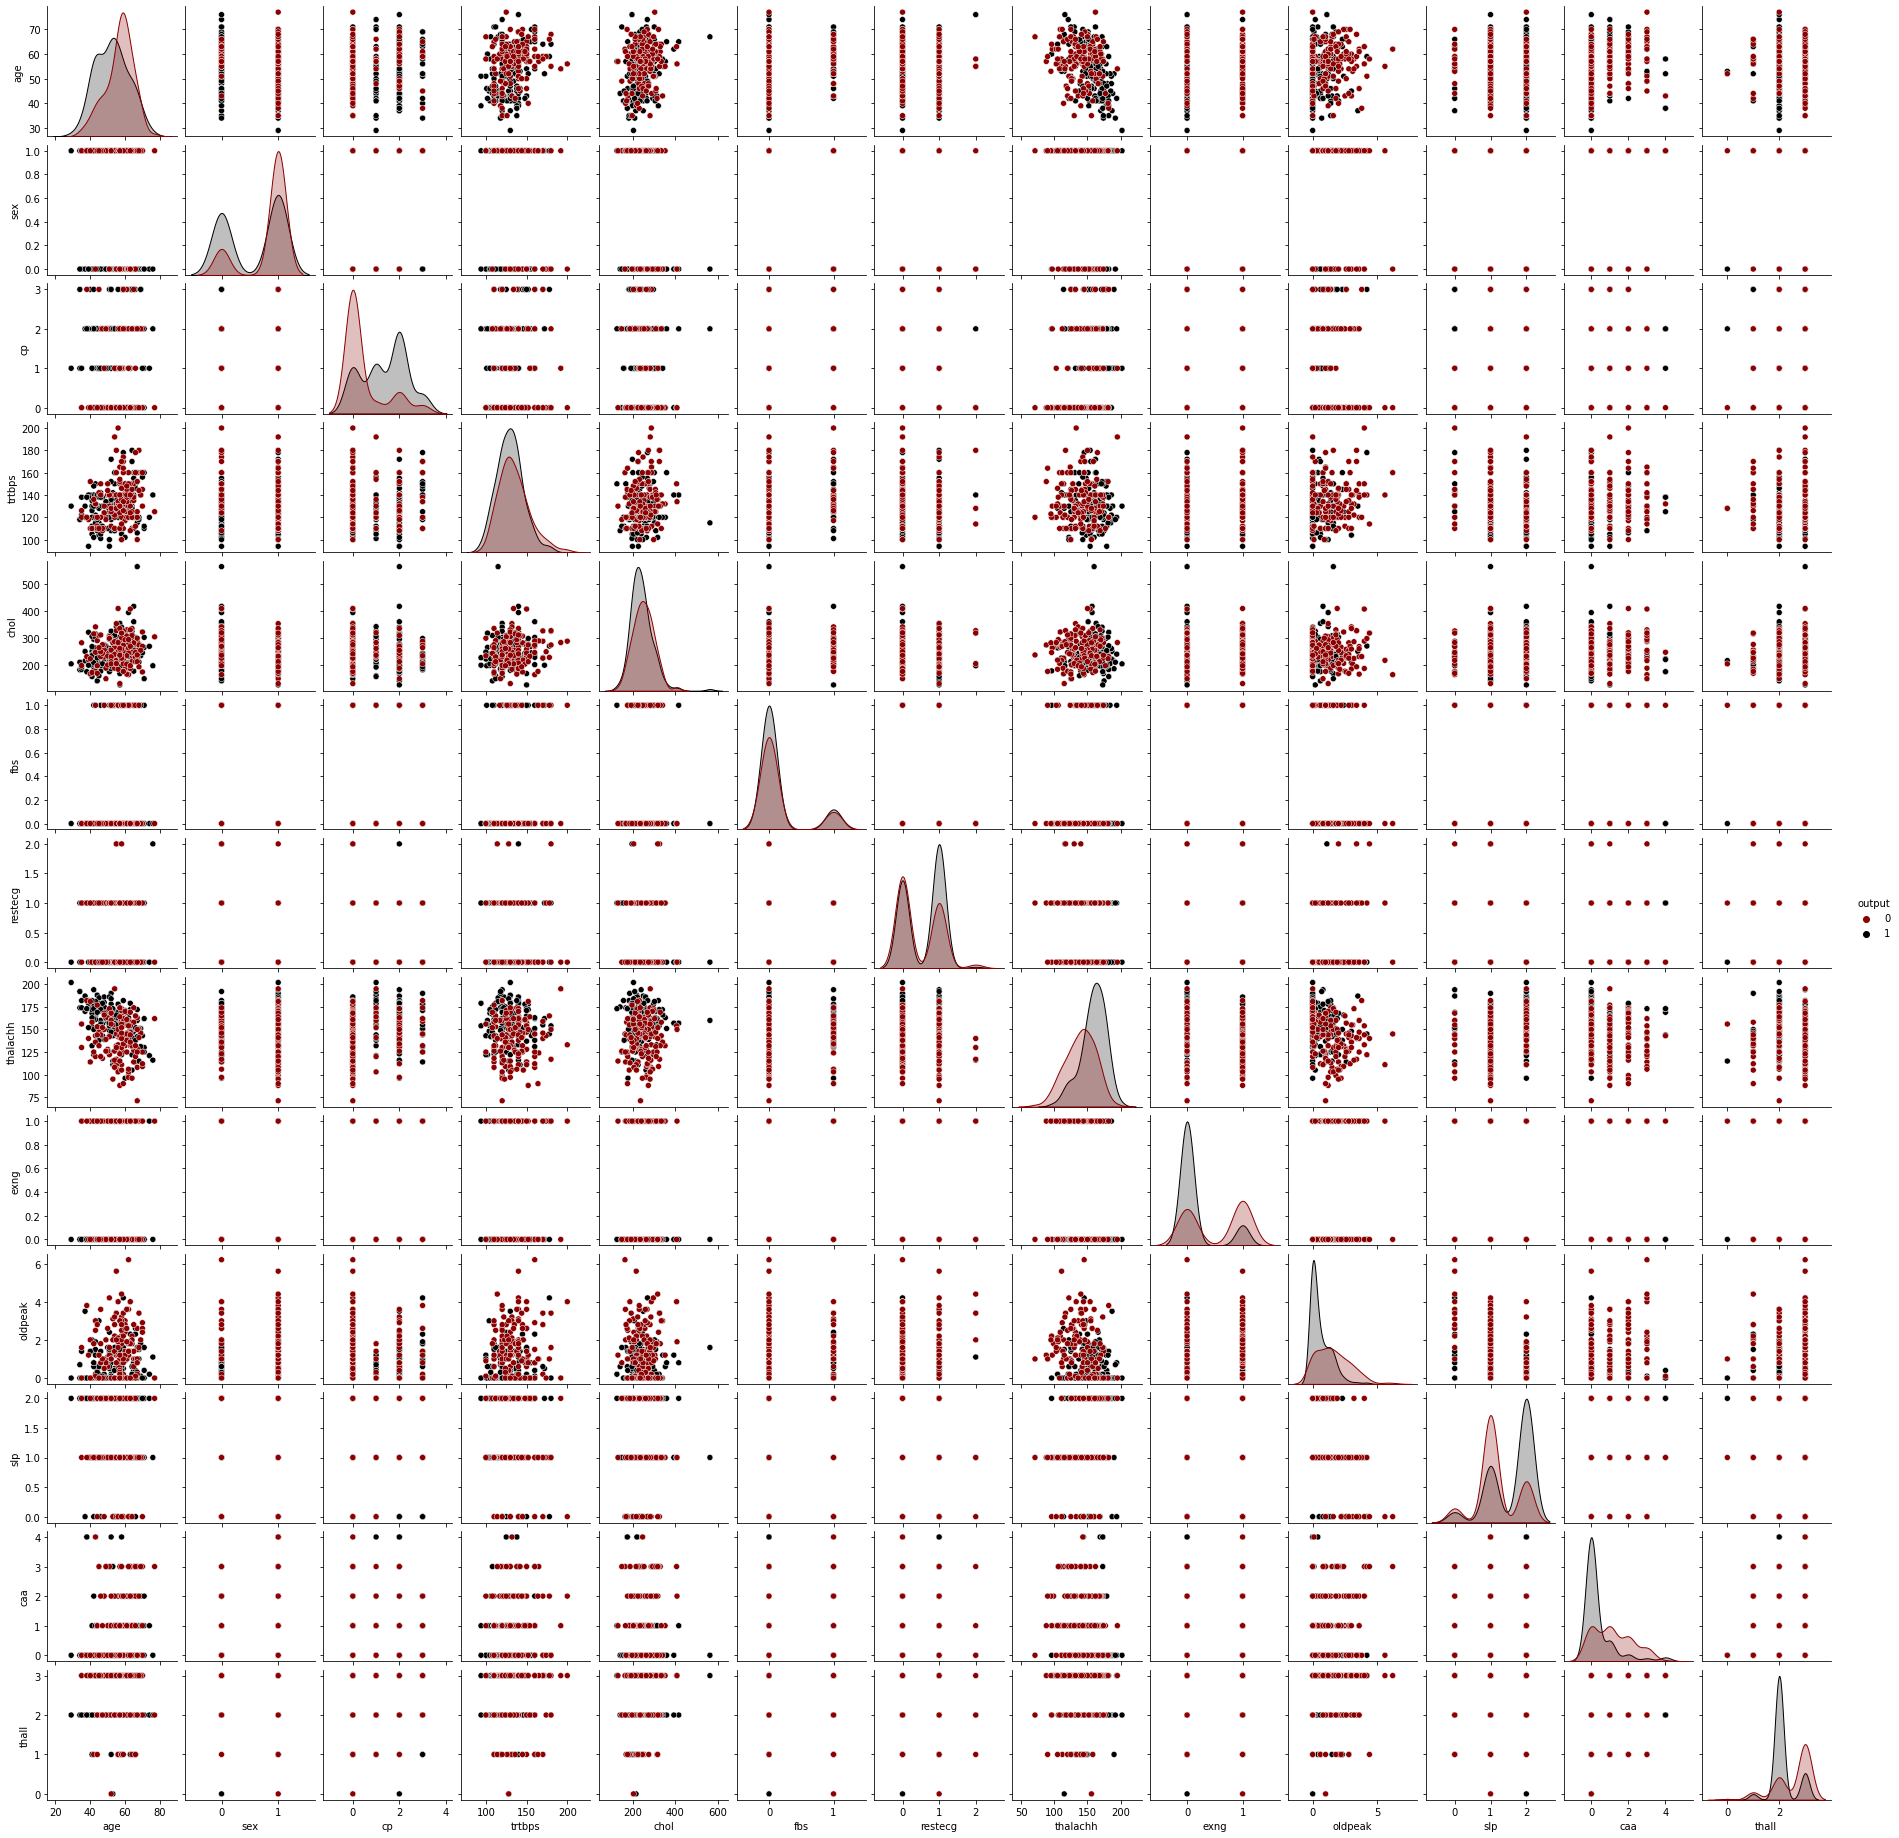

In [ ]:
fig=plt.figure(figsize=(20,15),dpi=100)
colors=['darkred','black']
sns.pairplot(data=patients_report,hue='output',size=2,palette=colors)
plt.show()

Univariate Analysis of Categorical Variables

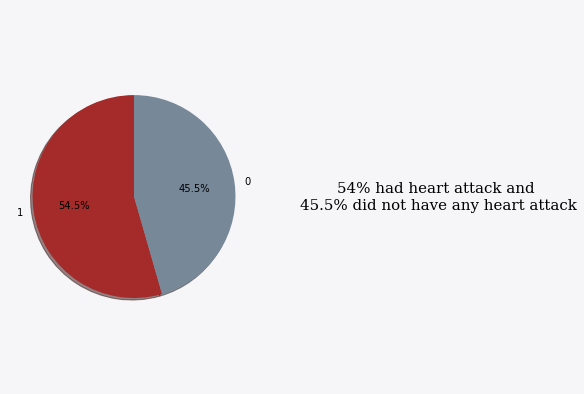

In [ ]:
colors=['brown','lightslategrey']

fig= plt.figure(figsize=(10,7))
gs=fig.add_gridspec(1,2)
ax0= fig.add_subplot(gs[0,0])
ax1= fig.add_subplot(gs[0,1])
axes=[ax0,ax1]
background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
    i.spines["bottom"].set_visible(False)
    i.spines["left"].set_visible(False)
    i.set_xlabel("")
    i.set_ylabel("")
    i.set_xticklabels([])
    i.set_yticklabels([])
fig.patch.set_facecolor(background_color) 
labels=data_categorical['output'].value_counts().index
values=data_categorical['output'].value_counts()
ax0.pie(values,  labels=labels, colors=colors, autopct='%1.1f%%', shadow=True,startangle = 90)

ax1.text(0.5,0.5,'54% had heart attack and \n45.5% did not have any heart attack',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 15,fontfamily='serif')
for i in ["top","right","bottom","left"]:
    ax1.spines[i].set_visible(False)
ax1.tick_params(left=False, bottom=False)



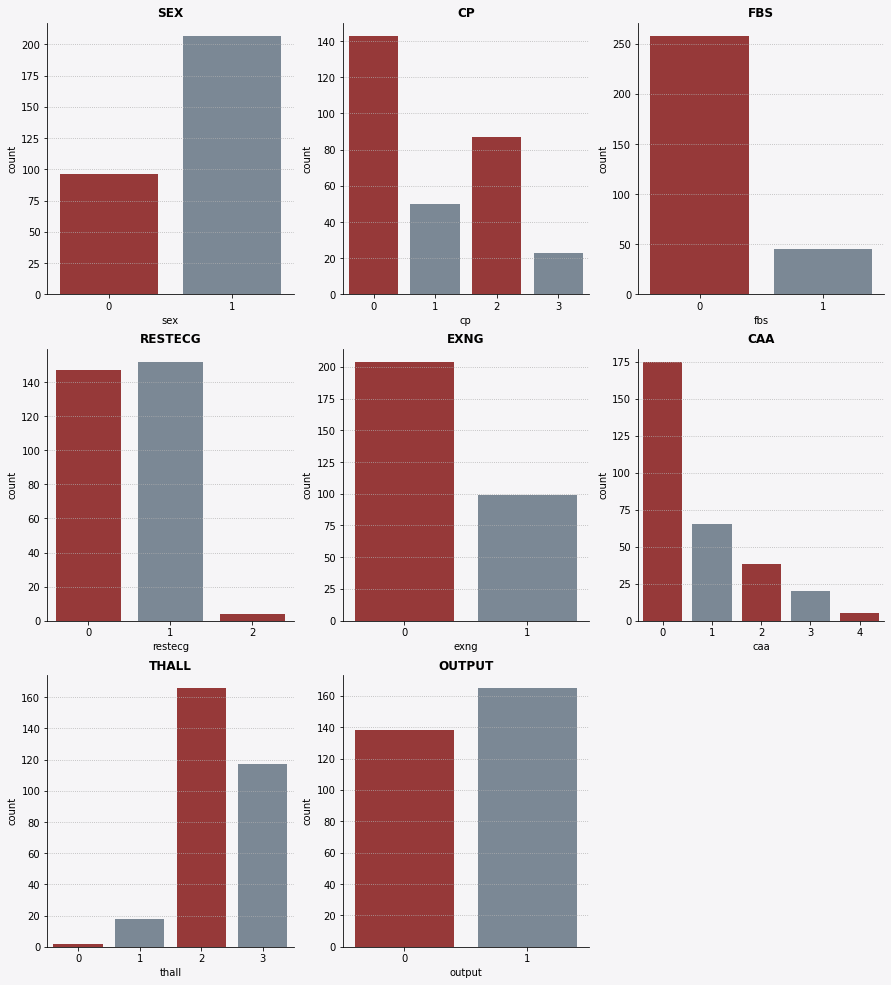

In [ ]:
colors=['brown','lightslategrey']
fig=plt.figure(figsize=(15,23))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color) 
for indx,val in enumerate(data_categorical.columns):
    ax=plt.subplot(4,3,indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val.upper(),fontweight='bold')
    for i in ['top','right']:
        ax.spines[i].set_visible(False)
    ax.grid(linestyle=':',axis='y')
    sns.countplot(data_categorical[val],palette=colors)



Observations :

1) Sex : The number of males are way more than the number of females in our data (male=1 , female = 0).

2) CP: People with type 0 chest pain (typical angina) are way more in number than the other groups. Type 3 cp (asymptomatic) are in the least ammount.

3) FBS: People with fasting blood sugar <120 are greater in number than people with blood sugar levels>120.

4) RESECG : 0 ( normal) and 1(having ST-T wave abnormality) are almost equal in number. This will be useful for predicting heart attack. Type 2 is almost negligible.

5) EXANG : People without exang (0) are almost double the amount of people with exang.

6) CA : People with blood vessels 0 occupy most amount of our data. More number of heart attacks were observed when CA=0 (previous analysis) .

7) THAL : People with thal 2 are more in number. No information was given about this(may not include this in predictions).


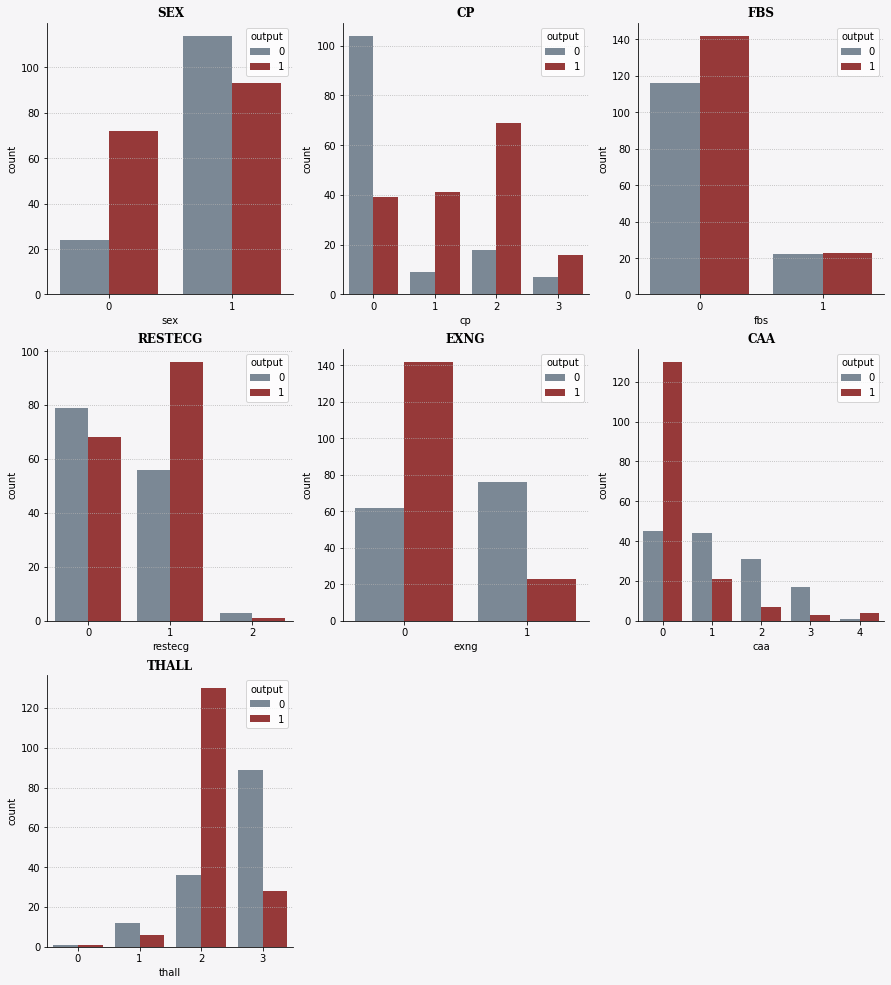

In [ ]:
#Analysis with output

data_cat=data_categorical[['sex','cp','fbs','restecg','exng','caa','thall']]
fig=plt.figure(figsize=(15,23))
colors=['lightslategrey','brown']
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color) 
for indx,val in enumerate(data_cat.columns):
    ax=plt.subplot(4,3,indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val.upper(),fontweight='bold',fontfamily='serif')
    for i in ['top','right']:
        ax.spines[i].set_visible(False)
    ax.grid(linestyle=':',axis='y')
    sns.countplot(data_cat[val],palette=colors,hue=patients_report['output'])


Observations :

1) Sex: Men experience more heart attacks than women.

2) CP : People with type 2 chest pain(atypical angina) are more prone to heart attacks than any other type of chest pain (only few with type 2 pain did not get heart attack).

3) FBS : People with fasting blood sugar < 120 experienced more heart attacks. Will have to look at this again.

4) RESTECG :People with type 1 restecg(having ST-T wave abnormality) experienced the highest heart attacks (this is expected). Surprisingly, people with normal restecg also experiencecd heart attacks a lot. Type 2 restesg can be ignored.

5) EXANG: People with exercise induced angina are more prone to heart attacks.

6) CA : People with 0 number of major blood vessels experienced the highest amount of heart attacks (expected) .


Percentage of men and women who got heart attack¶

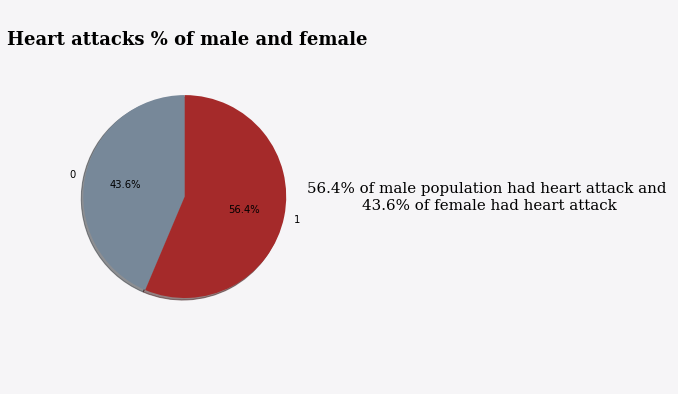

In [ ]:
sum_target = patients_report['output'].sum()
data_sex = pd.pivot_table(data=patients_report[patients_report['output']==1],index=patients_report['sex'],values='output',aggfunc='count').reset_index()
data_sex['percentage'] = (data_sex['output']*100)/sum_target
colors=['lightslategrey','brown']
fig=plt.figure(figsize=(10,7))
gs=fig.add_gridspec(1,2)
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
axes=[ax0,ax1]
background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
    i.spines["bottom"].set_visible(False)
    i.spines["left"].set_visible(False)
    i.set_xlabel("")
    i.set_ylabel("")
    i.set_xticklabels([])
    i.set_yticklabels([])
fig.patch.set_facecolor(background_color) 
labels=data_sex['sex']
values=data_sex['percentage']
ax0.pie(values,  labels=labels, colors=colors, autopct='%1.1f%%', shadow=True,startangle = 90)

ax1.text(0.5,0.5,'56.4% of male population had heart attack and \n43.6% of female had heart attack',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 15,fontfamily='serif')
plt.text(-1.4,0.9,'Heart attacks % of male and female',fontsize=18,fontweight='bold',fontfamily='serif')   
for i in ["top","right","bottom","left"]:
    ax1.spines[i].set_visible(False)
ax1.tick_params(left=False, bottom=False)




Fasting Blood Sugar

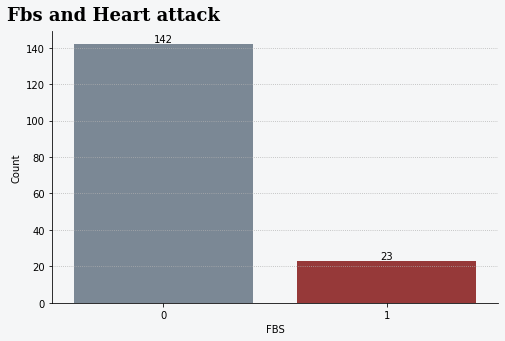

In [ ]:
fig, axes =plt.subplots(1,1, figsize=(8,5))
background_color = '#f5f6f7'
fig.patch.set_facecolor(background_color)
axes.set_facecolor(background_color)
data_fbs=pd.pivot_table(data=patients_report[patients_report['output']==1],index = patients_report['fbs'], values='output', aggfunc='count').reset_index()

sns.barplot(ax=axes, x=data_fbs['fbs'], y=data_fbs['output'], palette=colors)
for idx, val in enumerate(data_fbs['output']):
  axes.text(idx, val+1, round(val, 1), horizontalalignment='center')
axes.grid(linestyle=":", axis='y')
axes.set_xlabel('FBS')
axes.set_ylabel('Count')
plt.text(-0.7,155,'Fbs and Heart attack',fontsize=18,fontweight='bold',fontfamily='serif')

for i in ['top','right']:
    axes.spines[i].set_visible(False)



Chest pain and Heart attack

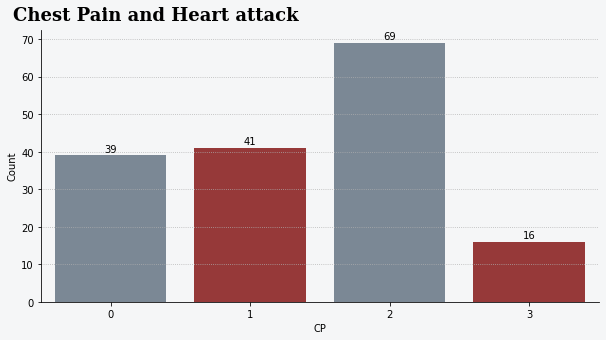

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(10,5))
backgroundcolor='#f6f5f7'
fig.patch.set_facecolor(background_color)
axes.set_facecolor(background_color)
data_cp = pd.pivot_table(data=patients_report[patients_report['output']==1],index=patients_report['cp'],values='output',aggfunc='count').reset_index()
sns.barplot(ax=axes,x=data_cp['cp'],y=data_cp['output'],palette=colors)
for idx,val in enumerate(data_cp['output']):
    axes.text( idx,val+1, round(val, 1), horizontalalignment='center')
axes.grid(linestyle=':',axis='y')
axes.set_xlabel('CP')
axes.set_ylabel('Count')
plt.text(-0.7,75,'Chest Pain and Heart attack',fontsize=18,fontweight='bold',fontfamily='serif')

for i in ['top','right']:
    axes.spines[i].set_visible(False)




Checking for outliers

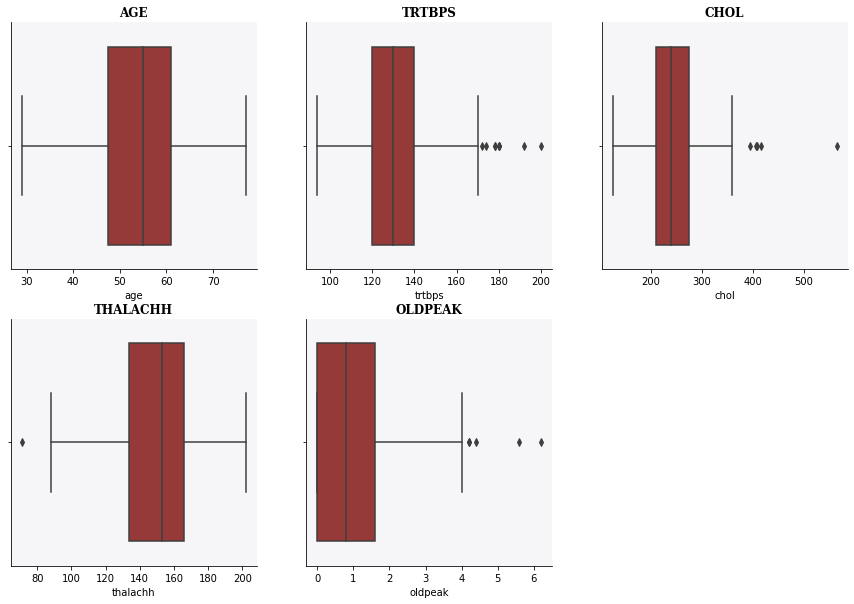

In [ ]:
plt.figure(figsize=(15,10))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color) 
for idx,val in enumerate(data_numerical.columns):
    ax=plt.subplot(2,3,idx+1)
    sns.boxplot(data_numerical[val],palette=colors)
    ax.set_facecolor(background_color)
    ax.set_title(val.upper(),fontweight='bold',fontfamily='serif')
    for i in ['top','right']:
        ax.spines[i].set_visible(False)

Cholesterol , Old peak , Resting bp have outliers. To standardize our data, we can ignore them

Data PreProcessing

In [ ]:
# Before training the models we are going to drop the slope and target columns.
data_target=patients_report['output']
patients_report.drop(columns=['slp','output'],inplace=True)

In [ ]:
# One-Hot encoding of Categorical Variables
data_dummies=patients_report[['sex','cp','fbs','restecg','exng','caa','thall']]
data_dummies= pd.get_dummies(data_dummies,columns=['sex','cp','fbs','restecg','exng','caa','thall'])


In [ ]:
# Merging the dummy variables and our original data
patients_report.drop(columns=['sex','cp','fbs','restecg','exng','caa','thall'],inplace=True)
data=patients_report.merge(data_dummies,left_index=True, right_index=True,how='left')
data.head()

,age,trtbps,chol,thalachh,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exng_0,exng_1,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [ ]:
# Splitting the data into training and testing sets.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,data_target,test_size=0.3,random_state=42)

In [ ]:
# Standardizing the training and testing data.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


We perform feature scaling after splitting the data into training and testing sets in order to avoid data leakage.

Training and Prediction

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [ ]:
colors=['black','grey']
def Model(model):
    model.fit(x_train,y_train)
    score = model.score(x_test, y_test)
    model_train_score = model.score(x_train, y_train)
    model_test_score = model.score(x_test, y_test)
    prediction = model.predict(x_test)
    cm = confusion_matrix(y_test,prediction)
    print('Testing Score \n',score)
    plot_confusion_matrix(model,x_test,y_test,cmap='rocket_r')
    metrics.plot_roc_curve(model, x_test, y_test)    



Testing Score 
 0.8461538461538461
Accuracy Score :  None


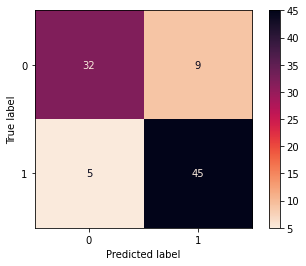

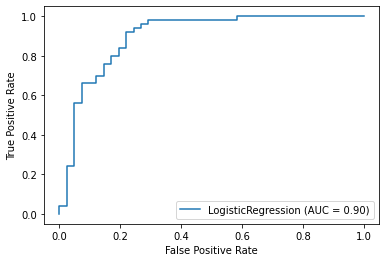

In [54]:
#Logistic Regression
lg_reg=LogisticRegression()
print("Accuracy Score : ",Model(lg_reg) )



Testing Score 
 0.7582417582417582


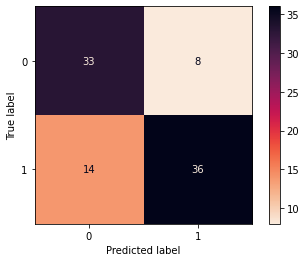

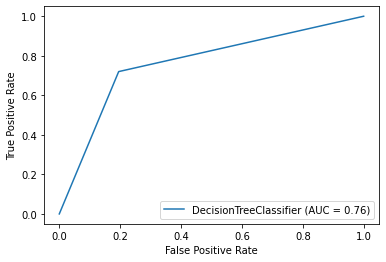

In [ ]:
# Decision Tree Classification
d_classif = DecisionTreeClassifier()
Model(d_classif)

Testing Score 
 0.8021978021978022


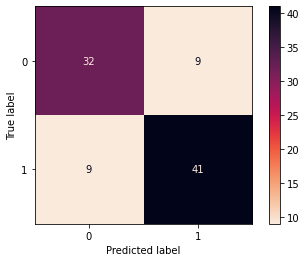

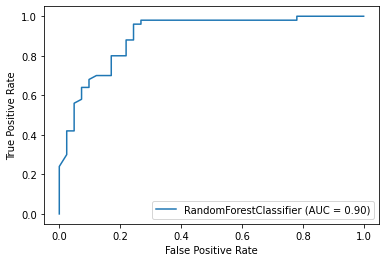

In [ ]:
#RandomForestClassifier
reg_tree = RandomForestClassifier()
Model(reg_tree)



The confusion matrix interpretation (Yes : 1, No, 0) :

1) The first element is True Negative([0,0]) - Actual Value and Predicted Value is 0.

2) The second element is False Positive([0,1]) - Actual Value is 0 and Predicted Value is 1.

3) The third element is False Negative([1,0]) - Actual value is 1 but Predicted Value is 0.

4) The Fourth element is True Positive([1,1]) - Actual value is 1 and Pedicted Value is 1.

Accuracy Score = (TP + TN)/Total

Random Forest Classifier performed better than Decision Tree Classifier and Logistic Regression for our data because it's accuracy is more compared to others.

